# Making a Viral Video 🎬
by Nicholas Smith

# Introduction:

In September 2023, Twitch had about 7.13 million active streamers. Before that, in
2017, an article created by The Sun States stated 75% of children (in the United States) between
the ages of 6 and 17 want to become YouTubers. In modern day society, it has become a rising trend to 
become famous online (through streaming websites such as YouTube and Twitch). 
I believe further analysis of trending YouTube videos could lead to a better understanding of its algorithm used to recommend its videos. 

# Imported libraries:

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from collections import Counter

# First, the .JSON file is converted into a .CSV:    ⤦

In [2]:
json_file_path = 'US_category_id.json'  # Replace with the actual path to the JSON file
csv_file_path = 'US_category_id.csv'  # Replace with the desired path for the CSV output

# Read the JSON file
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Convert JSON to DataFrame
JSdf = pd.json_normalize(data['items'])

# Save the DataFrame to CSV
JSdf.to_csv(csv_file_path, index=False)

JSds = pd.read_csv('US_category_id.csv')

# Next, the dataset information is displayed by category:   ⤦

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width",500)

df = pd.read_csv('USVideos.csv')

# Dataset Breakdown:

In [4]:
df.shape

(40949, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [6]:
df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


# Dataset Exploration:

In [7]:
import pandas as pd

# Load the dataset

# Display the row with the maximum number of views
max_views_row = df[df['views'] == df['views'].max()]
print("Video with the highest views:")
print(max_views_row[['title', 'views']])

Video with the highest views:
                                                   title      views
38547  Childish Gambino - This Is America (Official V...  225211923


In [8]:
# Split the 'tags' column into a list of individual tags
tags_list = df['tags'].str.split('|')

all_tags = []
for tags in tags_list.dropna():
    for tag in tags:
        all_tags.append(tag.lower()) #<-- cleans up tags as, now, all tags are now seen in lowercase

# Create a DataFrame to store the counts of each tag
tag_counts = pd.Series(all_tags).value_counts().reset_index()

tag_counts.columns = ['tag', 'count']

# Display the top 10 tags and their counts
print("Top 60 tags & their counts:")
print(tag_counts.head(60))

Top 60 tags & their counts:
                  tag  count
0             "funny"   4123
1            "comedy"   3573
2            "how to"   1652
3               "pop"   1627
4             "music"   1562
5              [none]   1535
6           "trailer"   1278
7              "food"   1255
8              "2018"   1251
9            "review"   1236
10            "humor"   1196
11          "science"   1190
12             "news"   1184
13           "makeup"   1164
14        "celebrity"   1081
15         "tutorial"   1054
16       "television"   1024
17             "live"   1020
18        "interview"    988
19             "vlog"    958
20    "entertainment"    945
21            "video"    940
22            "movie"    906
23        "animation"    901
24         "official"    896
25              "diy"    879
26         "comedian"    879
27              "fun"    849
28        "hollywood"    847
29          "cooking"    837
30             "cute"    825
31           "beauty"    819
32        "talk

In [9]:
# Convert 'trending_date' to datetime object
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

# Define a function to get the season
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

# Extract the season from 'trending_date'
df['season'] = df['trending_date'].dt.month.apply(get_season)

# Group by season and sum the view counts
season_view_counts = df.groupby('season')['views'].sum()

# Display the results
print("Total view counts per season:")
print(season_view_counts)

Total view counts per season:
season
Fall       4206798140
Spring    55319744461
Summer    14420249655
Winter    22724977896
Name: views, dtype: int64


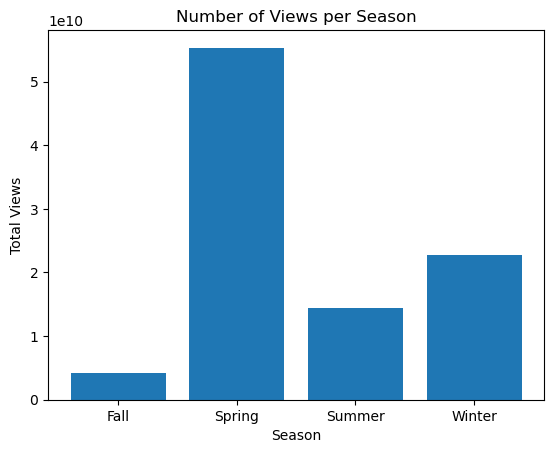

In [10]:
# Convert 'trending_date' to datetime object
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

# Extract the season from 'trending_date'
df['season'] = df['trending_date'].dt.month.apply(get_season)

# Group by season and sum the view counts
season_view_counts = df.groupby('season')['views'].sum()

# Plotting
plt.bar(season_view_counts.index, season_view_counts)
plt.xlabel('Season')
plt.ylabel('Total Views')
plt.title('Number of Views per Season')
plt.show()

In [11]:
# Convert 'trending_date' to datetime object
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

# Define a function to get the season
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

# Extract the season from 'trending_date'
df['season'] = df['trending_date'].dt.month.apply(get_season)

# Group by season and find the top 10 videos for each season
top_videos_per_season = df.groupby('season').apply(lambda x: x.nlargest(20, 'views')).reset_index(drop=True)

# Display the results
for season, season_data in top_videos_per_season.groupby('season'):
    print(f"\nTop 10 videos for {season} season:")
    for index, row in season_data.iterrows():
        video_id = row['title']
        views = row['views']
        trending_date = row['trending_date'].strftime('%Y-%m-%d')
        print(f"Video ID: {video_id}, Views: {views}, Trending Date: {trending_date}")


Top 10 videos for Fall season:
Video ID: Luis Fonsi, Demi Lovato - Échame La Culpa, Views: 102012605, Trending Date: 2017-11-26
Video ID: Luis Fonsi, Demi Lovato - Échame La Culpa, Views: 91552137, Trending Date: 2017-11-25
Video ID: Luis Fonsi, Demi Lovato - Échame La Culpa, Views: 80605857, Trending Date: 2017-11-24
Video ID: Luis Fonsi, Demi Lovato - Échame La Culpa, Views: 68997838, Trending Date: 2017-11-23
Video ID: Luis Fonsi, Demi Lovato - Échame La Culpa, Views: 56843038, Trending Date: 2017-11-22
Video ID: Luis Fonsi, Demi Lovato - Échame La Culpa, Views: 47078714, Trending Date: 2017-11-21
Video ID: Ed Sheeran - Perfect (Official Music Video), Views: 43449654, Trending Date: 2017-11-16
Video ID: Ed Sheeran - Perfect (Official Music Video), Views: 39082222, Trending Date: 2017-11-15
Video ID: Luis Fonsi, Demi Lovato - Échame La Culpa, Views: 38646917, Trending Date: 2017-11-20
Video ID: Marvel Studios' Avengers: Infinity War Official Trailer, Views: 37736281, Trending Date: 

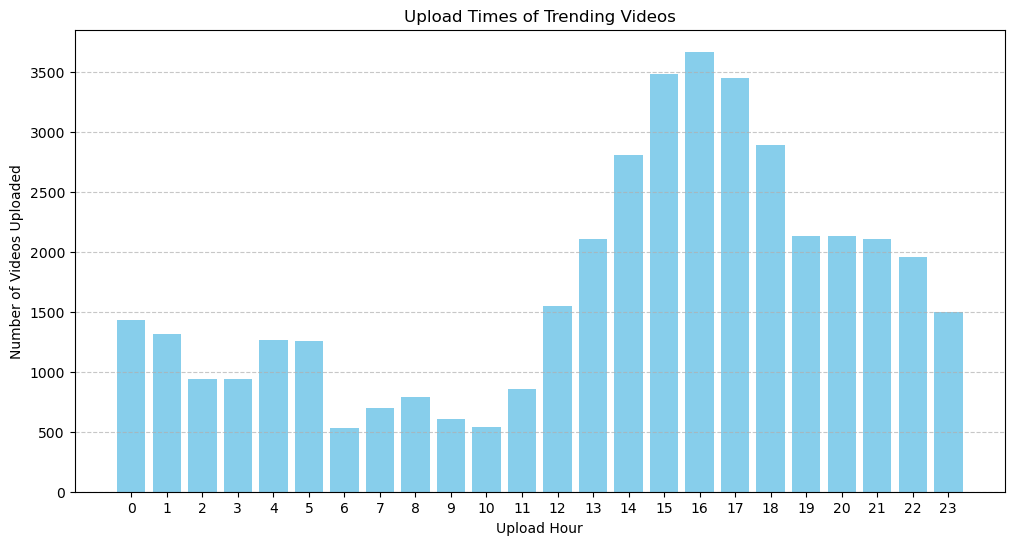

In [12]:
# Convert the 'trending_date' and 'publish_time' to datetime objects
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# Extract the upload hour from 'publish_time'
df['upload_hour'] = df['publish_time'].dt.hour

# Groups by upload hour & count number of videos uploaded at each hour
upload_hour_counts = df['upload_hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(upload_hour_counts.index, upload_hour_counts.values, color='skyblue')
plt.title('Upload Times of Trending Videos')
plt.xlabel('Upload Hour')
plt.ylabel('Number of Videos Uploaded')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Here, the highest upload frequency is at 16:00. 16:00 in military time is 4 pm.

# Now, let's explore the converted .JSON file data:     ⤦

In [13]:
df.shape

(40949, 18)

In [14]:
JSdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   kind                32 non-null     object
 1   etag                32 non-null     object
 2   id                  32 non-null     object
 3   snippet.channelId   32 non-null     object
 4   snippet.title       32 non-null     object
 5   snippet.assignable  32 non-null     bool  
dtypes: bool(1), object(5)
memory usage: 1.4+ KB


In [15]:
JSdf.head(10)

,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True
5,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/FJwVpGCVZ1yiJrqZb...",18,UCBR8-60-B28hp2BmDPdntcQ,Short Movies,False
6,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/M-3iD9dwK7YJCafRf...",19,UCBR8-60-B28hp2BmDPdntcQ,Travel & Events,True
7,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/WmA0qYEfjWsAoyJFS...",20,UCBR8-60-B28hp2BmDPdntcQ,Gaming,True
8,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/EapFaGYG7K0StIXVf...",21,UCBR8-60-B28hp2BmDPdntcQ,Videoblogging,False
9,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True


# Next, we'll look further into Genre analytics:    ⤦

In [16]:
print(JSdf['snippet.title'])

0          Film & Animation
1          Autos & Vehicles
2                     Music
3            Pets & Animals
4                    Sports
5              Short Movies
6           Travel & Events
7                    Gaming
8             Videoblogging
9            People & Blogs
10                   Comedy
11            Entertainment
12          News & Politics
13            Howto & Style
14                Education
15     Science & Technology
16    Nonprofits & Activism
17                   Movies
18          Anime/Animation
19         Action/Adventure
20                 Classics
21                   Comedy
22              Documentary
23                    Drama
24                   Family
25                  Foreign
26                   Horror
27           Sci-Fi/Fantasy
28                 Thriller
29                   Shorts
30                    Shows
31                 Trailers
Name: snippet.title, dtype: object


In [17]:
#Code does the following: Compares df.category_id with JSdf.id and counts # of JS.df['title'] overall
    # * df.category_id -> JSdf.id -> same ID? -> print the corresponding id for it

count = 1
    
def get_title_by_id(video_id):
    try:
        # Find the row with the specified video_id
        row = JSdf[JSdf['id'] == video_id]
        # Extract and return the snippet.title
        title = JSdf['snippet.title'].values[video_id]
        return title
    except IndexError:
        # Handle the case when the video_id is not found
        return f"Video with ID {video_id} not found."

print('Matching ID to a Video Genre')
print('--------------------------------------')

for videoIDinUSvideos in df.category_id:
    title = get_title_by_id(videoIDinUSvideos)
    print(f"The genre for video ID {videoIDinUSvideos} is: {title}")
    if count == 10:
        break
    count+=1
    
print('...')

Matching ID to a Video Genre
--------------------------------------
The genre for video ID 22 is: Documentary
The genre for video ID 24 is: Family
The genre for video ID 23 is: Drama
The genre for video ID 24 is: Family
The genre for video ID 24 is: Family
The genre for video ID 28 is: Thriller
The genre for video ID 24 is: Family
The genre for video ID 28 is: Thriller
The genre for video ID 1 is: Autos & Vehicles
The genre for video ID 25 is: Foreign
...


In [66]:
# Assuming JSdf is another DataFrame containing the 'snippet.title' information
# Make sure to load or create this DataFrame before using the function

# Load the dataset
def get_title_by_id(video_id, JSdf):
        id_retry = ""
        if video_id == 22:
            id_retry = "People & Blogs"
        if video_id == 24:
            id_retry = "Entertainment"
        if video_id == 23:
            id_retry = "Comedy"
        if video_id == 28:
            id_retry = "Science & Technology"
        if video_id == 1:
            id_retry = "Film & animation"
        if video_id == 25:
            id_retry = "News & Politics"
        if video_id == 17:
            id_retry = "Sports"
        if video_id == 10:
            id_retry = "Music"
        if video_id == 15:
            id_retry = "Pets & Animals"
        if video_id == 27:
            id_retry = "Education"
        if video_id == 26:
            id_retry = "Howto & Style"
        if video_id == 2:
            id_retry = "Auto & Vehicles"
        if video_id == 19:
            id_retry = "Travel & Events"
        if video_id == 20:
            id_retry = "Gaming"
        if video_id == 29:
            id_retry = "Nonprofits & Activism"
        if video_id == 43:
            id_retry = "Shows"
        return id_retry

# Counter to store the frequency of each title
title_counter = Counter()

for video_id_to_search in df.category_id:
    title = get_title_by_id(video_id_to_search, JSdf)
    title_counter.update([title])

# Display the title frequencies
print("\nTitle Frequencies:")

for title, count in title_counter.items():
    print(f"{title} - {count} times")


Title Frequencies:
People & Blogs - 3210 times
Entertainment - 9964 times
Comedy - 3457 times
Science & Technology - 2401 times
Film & animation - 2345 times
News & Politics - 2487 times
Sports - 2174 times
Music - 6472 times
Pets & Animals - 920 times
Education - 1656 times
Howto & Style - 4146 times
Auto & Vehicles - 384 times
Travel & Events - 402 times
Gaming - 817 times
Nonprofits & Activism - 57 times
Shows - 57 times


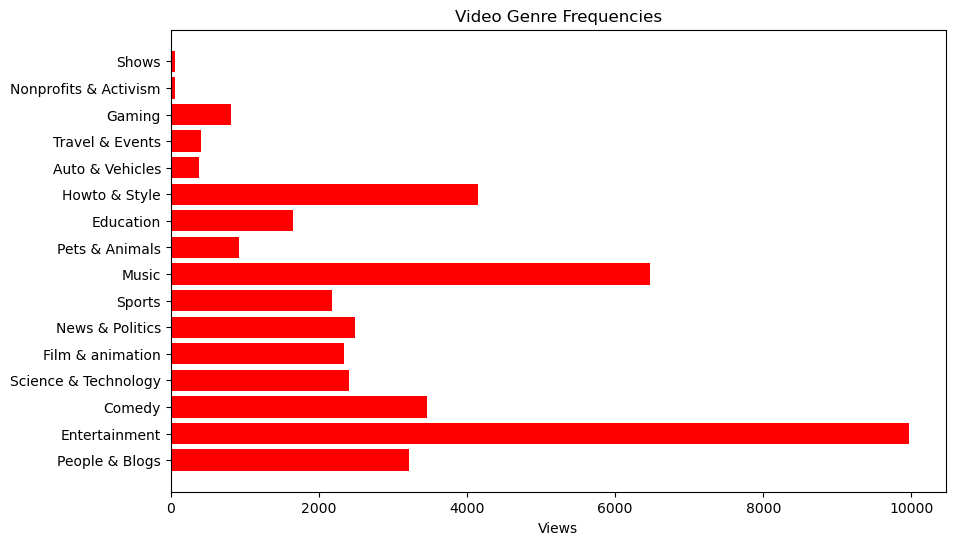

In [67]:
titles, counts = zip(*title_counter.items())

plt.figure(figsize=(10, 6))
plt.barh(titles, counts, color='red')
plt.xlabel('Views')
plt.title('Video Genre Frequencies')
plt.show()

# Guessing if a Title will be popular:

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

X = df['title']
y = df['views']

# uses Binary classification to convert views into either popular or not popular
median_views = y.median()
y_binary = (y > median_views).astype(int)

# Splits the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# creates pipeline with CountVectorizer and RandomForestClassifier (explained below)
model = make_pipeline(CountVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))

model.fit(X_train, y_train) # <-- fits the model on the training data

user_title = input("Enter a YouTube video title: ")

# Makes a prediction based on the user-input title
predicted_proba = model.predict_proba([user_title])[0, 1]

# Display the prediction
if predicted_proba > 0.5:
    print(f"The video title is predicted to be Popular with a probability of {predicted_proba:.2%}.")
else:
    print(f"The video title is predicted to NOT be Popular with a probability of {1 - predicted_proba:.2%}.")


Enter a YouTube video title: Funny Cat Video!
The video title is predicted to be Popular with a probability of 50.39%.


Use of CountVectorizer:

- Tokenization: Breaks down the TEXT into individual words or terms. Each word/terms is referred to as "tokens".

- Counting: Counts the FREQUENCY of each "token".

- Vectorization: Represents the words as a numeric vector where each vector's element corresponds to the COUNT of a particular token (or VIEWS in this case)

Use of RandomForestClassifier:

- Bootstrapping (aka "Bagging"): Creates multiple subsets of the original dataset by sampling with replacement. Each subset trains a separate decision tree.

- Feature Randomization: At each "split" in the Decision Tree, a random subset of features is looked at. This creates "diversity".

- Averaging: For classification tasks, each decision tree chooses a class & then is given an input data point. For Regression: Predicted values FROM individual trees are averaged.

# So, to make a Viral Video...

1) The video Genre should be: Entertainment, followed by Music, then How-to videos and lastly Comedy 
    - The caveat here is most music is uploaded by bigger artists
    
2) The video Tags should be: "funny", "comedy", "how to", "pop", "music", "trailer", "food", "review", "humor", etc.


3) The video should be Uploaded between: March, April, May & June (Spring)
    - Spring time holds the MOST popular videos between 2017-2018
    
4) The videos upload time should be 4 pm
    - The 2nd highest time is 3 pm & the 3rd highest time is 5pm  